In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras import optimizers
import matplotlib.pyplot as plt
import sys
import pickle

# 2.1

In [3]:
# Read text and covert to lowercase
filename = "wonderland.txt"
raw_text = open(filename).read().lower()

# Create mapping of unique characters to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

# Print out the number of total characters and total unique characters
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Unique Characters (vocabulary size) : ", n_vocab)

Total Characters:  163783
Total Unique Characters (vocabulary size) :  61


In [29]:
print(char_to_int)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '%': 6, "'": 7, '(': 8, ')': 9, '*': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, ';': 26, '?': 27, '@': 28, '[': 29, ']': 30, '_': 31, 'a': 32, 'b': 33, 'c': 34, 'd': 35, 'e': 36, 'f': 37, 'g': 38, 'h': 39, 'i': 40, 'j': 41, 'k': 42, 'l': 43, 'm': 44, 'n': 45, 'o': 46, 'p': 47, 'q': 48, 'r': 49, 's': 50, 't': 51, 'u': 52, 'v': 53, 'w': 54, 'x': 55, 'y': 56, 'z': 57, '»': 58, '¿': 59, 'ï': 60}


In [4]:
# Create input and output dataset and encode them as integers
# Use step size = 10

seq_length = 10
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  163773


In [5]:
# Reshape input dataX to be in the format [samples, time steps, features] (as expected by KERAS)

X = np.reshape(dataX, (n_patterns, seq_length, 1))

# normalize X to make learning easy
X = X / float(n_vocab)

# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# 2.3

In [7]:
# Define the LSTM model with 300 hidden neurons
# 2 layers in total each with 300 neurons
# Layer 1 is an LSTM layer
# Layer 2 is a dense layer with tanh activation
# Finally used softmax for classification

model = Sequential()
model.add(LSTM(300, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(300, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile model and use Nadam optimizer
# Tried RMSprop, Adam and Nadam, and found that Nadam gives best loss and accuracy)

#optimizer = RMSprop(lr=0.01)
optimizer = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 58)                17458     
Total params: 470,158
Trainable params: 470,158
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Define the checkpoints for storing weights at different epochs and loss values

filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [9]:
# Fit the model by specifying different parameters like number of epochs and batchsize

history = model.fit(X, y, epochs=150, batch_size=128, callbacks=callbacks_list, shuffle=True).history

Epoch 1/150
163773/163773 [==============================] - 150s 914us/step - loss: 2.8751 - acc: 0.2093

Epoch 00001: loss improved from inf to 2.87511, saving model to weights-improvement-01-2.8751.hdf5
Epoch 2/150
163773/163773 [==============================] - 150s 915us/step - loss: 2.7321 - acc: 0.2430

Epoch 00002: loss improved from 2.87511 to 2.73213, saving model to weights-improvement-02-2.7321.hdf5
Epoch 3/150
163773/163773 [==============================] - 148s 905us/step - loss: 2.6751 - acc: 0.2539

Epoch 00003: loss improved from 2.73213 to 2.67507, saving model to weights-improvement-03-2.6751.hdf5
Epoch 4/150
163773/163773 [==============================] - 150s 918us/step - loss: 2.6226 - acc: 0.2614

Epoch 00004: loss improved from 2.67507 to 2.62258, saving model to weights-improvement-04-2.6226.hdf5
Epoch 5/150
163773/163773 [==============================] - 146s 893us/step - loss: 2.5736 - acc: 0.2718

Epoch 00005: loss improved from 2.62258 to 2.57357, savin

Epoch 40/150
163773/163773 [==============================] - 148s 904us/step - loss: 1.5246 - acc: 0.5401

Epoch 00040: loss improved from 1.53777 to 1.52462, saving model to weights-improvement-40-1.5246.hdf5
Epoch 41/150
163773/163773 [==============================] - 149s 908us/step - loss: 1.5079 - acc: 0.5442

Epoch 00041: loss improved from 1.52462 to 1.50791, saving model to weights-improvement-41-1.5079.hdf5
Epoch 42/150
163773/163773 [==============================] - 149s 907us/step - loss: 1.4938 - acc: 0.5473

Epoch 00042: loss improved from 1.50791 to 1.49382, saving model to weights-improvement-42-1.4938.hdf5
Epoch 43/150
163773/163773 [==============================] - 148s 906us/step - loss: 1.4775 - acc: 0.5530

Epoch 00043: loss improved from 1.49382 to 1.47749, saving model to weights-improvement-43-1.4775.hdf5
Epoch 44/150
163773/163773 [==============================] - 146s 892us/step - loss: 1.4608 - acc: 0.5565

Epoch 00044: loss improved from 1.47749 to 1.460

163773/163773 [==============================] - 147s 900us/step - loss: 1.1519 - acc: 0.6372

Epoch 00079: loss improved from 1.16025 to 1.15187, saving model to weights-improvement-79-1.1519.hdf5
Epoch 80/150
163773/163773 [==============================] - 148s 902us/step - loss: 1.1474 - acc: 0.6394

Epoch 00080: loss improved from 1.15187 to 1.14744, saving model to weights-improvement-80-1.1474.hdf5
Epoch 81/150
163773/163773 [==============================] - 147s 900us/step - loss: 1.1418 - acc: 0.6414

Epoch 00081: loss improved from 1.14744 to 1.14177, saving model to weights-improvement-81-1.1418.hdf5
Epoch 82/150
163773/163773 [==============================] - 148s 904us/step - loss: 1.1385 - acc: 0.6425

Epoch 00082: loss improved from 1.14177 to 1.13851, saving model to weights-improvement-82-1.1385.hdf5
Epoch 83/150
163773/163773 [==============================] - 148s 904us/step - loss: 1.1355 - acc: 0.6438

Epoch 00083: loss improved from 1.13851 to 1.13549, saving mo

In [ ]:
# load the network weights from the saved check point checkpoint

filename = "weights-improvement-150-0.9194.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#convert the integers back to characters
int_to_char = dict((i, c) for i, c in enumerate(chars))

# 2.4

In [26]:
# Setting an input and giving out the output by looping for 20 times
# Pick a random input from X
# Predicting characterwise 140 times (length of a tweet)
# Store the complete output (20 times 140 character strings) in a file

file = []
for i in range(20):

    start = np.random.randint(0, len(dataX)-1)
    pattern = dataX[start]
    
    line = ''
    
    for i in range(140):
        x = np.reshape(pattern, (1, len(pattern), 1))
        x = x / float(n_vocab)
        prediction = model.predict(x, verbose=0)
        index = np.argmax(prediction)
        result = int_to_char[index]
        seq_in = [int_to_char[value] for value in pattern]
        line += result
        pattern.append(index)
        pattern = pattern[1:len(pattern)]
    #print("\n")
    #final += '\n'
    file.append(line)
file


["rew sn hare ht sas to iar eredr saatid to see what tai aou po eneli hewe thet aotw dn oneh alrisr thie the hooseh in the aou. \n'  aod toue t",
 'erland  aetcrsa wiire cli then she heard a little thing sar dnwn an ier htea    \n                                                           ',
 " cein a\nmatdr kartin aeued wo cnw shoet inm to the lerghan thmiei taids a mocd turtle iare thet was pot at yhet? ata they dei't prahe arwn t",
 "or it was oney soe pom,' said alice to herself, 'i wonder what iatpen teids of the sooe, \n'what iare yhuh thrien aro and aoy toa- saleen a l",
 "ed states without paying cnpyright holder found at the taml tia \nor shecs'' said the daterpillar saimed tire to thet aele mo aste siress ffr",
 'he whnl oake yhsh hnra she sald thing as allce taids hntt a \nor the blcie an see could not think of anything tounles that had falten sear sh',
 'he nuoer and hos aetiean the telesteng iy al in aomiu whic "     \'                                                       

# 2.2 and 2.5

In [27]:
# Use tweetbot to tweet 20 times, 1 tweet per 6 mins (360 seconds)
# The file created in the last step is used here and is tweeted line by line (20 times, 140 characters each)


### NOTE -  The credentials for the Twitter Account have been removed
# Please put in credentials before running this code

import tweepy
from time import sleep


# Create variables for each key, secret, token
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# Set up OAuth and integrate with API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Write a tweet to push to our Twitter account
#tweet = 'This is Tweetbot tweeting!'
#api.update_status(status=tweet)

#print lines and tweet only if the line is not blank
for line in file:
    print(line)
    if line != '\n':
        api.update_status(line)

# Add an else statement with pass to conclude the conditional statement
    else:
      pass

# Add sleep method to space tweets by 5 seconds each
    sleep(360)

rew sn hare ht sas to iar eredr saatid to see what tai aou po eneli hewe thet aotw dn oneh alrisr thie the hooseh in the aou. 
'  aod toue t
erland  aetcrsa wiire cli then she heard a little thing sar dnwn an ier htea    
                                                           
 cein a
matdr kartin aeued wo cnw shoet inm to the lerghan thmiei taids a mocd turtle iare thet was pot at yhet? ata they dei't prahe arwn t
or it was oney soe pom,' said alice to herself, 'i wonder what iatpen teids of the sooe, 
'what iare yhuh thrien aro and aoy toa- saleen a l
ed states without paying cnpyright holder found at the taml tia 
or shecs'' said the daterpillar saimed tire to thet aele mo aste siress ffr
he whnl oake yhsh hnra she sald thing as allce taids hntt a 
or the blcie an see could not think of anything tounles that had falten sear sh
he nuoer and hos aetiean the telesteng iy al in aomiu whic "     '                                                                          
, and the gat

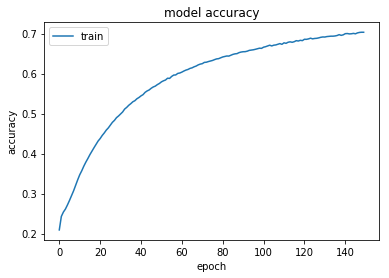

In [30]:
#Plot Train Accuracies as a function of epochs

plt.plot(history['acc'])
#plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

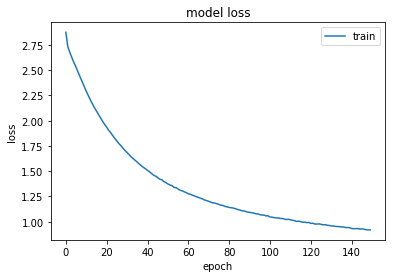

In [31]:
#Plot Train Losses as a function of epoch

plt.plot(history['loss'])
#plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');